In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer=pd.read_csv("C:\\Users\\USER\\Desktop\\analytixlabs\\DSA\\assigmets\\Python Foundation End to End Case Study_E-Commerce Analytics Project//CUSTOMERS.csv")
geo_loc=pd.read_csv("C:\\Users\\USER\\Desktop\\analytixlabs\\DSA\\assigmets\\Python Foundation End to End Case Study_E-Commerce Analytics Project//GEO_LOCATION.csv")
order_item=pd.read_csv("C:\\Users\\USER\\Desktop\\analytixlabs\\DSA\\assigmets\\Python Foundation End to End Case Study_E-Commerce Analytics Project//ORDER_ITEMS.csv")
order_pay=pd.read_csv("C:\\Users\\USER\\Desktop\\analytixlabs\\DSA\\assigmets\\Python Foundation End to End Case Study_E-Commerce Analytics Project//ORDER_PAYMENTS.csv")
order_review=pd.read_csv("C:\\Users\\USER\\Desktop\\analytixlabs\\DSA\\assigmets\\Python Foundation End to End Case Study_E-Commerce Analytics Project//ORDER_REVIEW_RATINGS.csv")
orders=pd.read_csv("C:\\Users\\USER\\Desktop\\analytixlabs\\DSA\\assigmets\\Python Foundation End to End Case Study_E-Commerce Analytics Project//ORDERS.csv")
products=pd.read_csv("C:\\Users\\USER\\Desktop\\analytixlabs\\DSA\\assigmets\\Python Foundation End to End Case Study_E-Commerce Analytics Project//PRODUCTS.csv")
sellers=pd.read_csv("C:\\Users\\USER\\Desktop\\analytixlabs\\DSA\\assigmets\\Python Foundation End to End Case Study_E-Commerce Analytics Project//SELLERS.csv")

In [3]:
customer.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh


In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
geo_loc.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh


In [6]:
geo_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 742.9+ KB


In [7]:
order_item.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.9,19.93


In [8]:
order_pay.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [9]:
order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [10]:

# fixing the datatypes of dates
order_item.shipping_limit_date = pd.to_datetime(order_item.shipping_limit_date, format = '%m/%d/%Y %H:%M')

In [11]:
order_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [12]:
order_review.head(2)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05


In [13]:
order_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_creation_date     100000 non-null  object
 4   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [14]:
# fixing the datatypes of dates
order_review.review_creation_date=pd.to_datetime(order_review.review_creation_date, format='%m/%d/%Y %H:%M')
order_review.review_answer_timestamp=pd.to_datetime(order_review.review_answer_timestamp, format='%m/%d/%Y %H:%M')

In [15]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00


In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [17]:
# fixing the datatypes of dates
orders.order_purchase_timestamp = pd.to_datetime(orders.order_purchase_timestamp, format = '%m/%d/%Y %H:%M')
orders.order_approved_at = pd.to_datetime(orders.order_approved_at, format = '%m/%d/%Y %H:%M')
orders.order_delivered_carrier_date = pd.to_datetime(orders.order_delivered_carrier_date, format = '%m/%d/%Y %H:%M')
orders.order_delivered_customer_date = pd.to_datetime(orders.order_delivered_customer_date, format = '%m/%d/%Y %H:%M')
orders.order_estimated_delivery_date = pd.to_datetime(orders.order_estimated_delivery_date, format = '%m/%d/%Y %H:%M')

In [18]:
products.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [19]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [20]:
sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh


In [21]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3038 non-null   object
 3   seller_state            3038 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


# 1. Perform Detailed exploratory analysis


a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)

In [22]:
#Total revenue
print("Total_revenue=" , round(order_item.price.sum()))

# Total quantity
print("Total_quantity=" ,order_item.shape[0])

#Total products
print('Total products =',products.product_id.nunique())

#Total categories
print('Total categories =', products.product_category_name.nunique())

#Total sellers
print('Total sellers =', sellers.seller_id.nunique())
      
#Total locations
print('Total locations =',geo_loc.geolocation_zip_code_prefix.nunique())      
      
#Total payment methods
print('Total payment methods =', order_pay.payment_type.nunique())    



Total_revenue= 13591644
Total_quantity= 112650
Total products = 32951
Total categories = 71
Total sellers = 3095
Total locations = 19015
Total payment methods = 5


b. Understanding how many new customers acquired every month

In [23]:
cust_order=pd.merge(left=customer,right=orders,how='inner',on='customer_id').sort_values(by='order_purchase_timestamp').reset_index(drop = True)
cust_order.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,08c5351a6aca1c1589a38f244edeee9d,b7d76e111c89f7ebf14761390f0f7d17,69309,Dholka,Gujarat,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:00,2016-10-07 13:18:00,2016-10-18 13:14:00,NaT,2016-10-20
1,683c54fc24d40ee9f8a6fc179fd9856c,4854e9b3feff728c13ee5fc7d1547e92,99025,Tuni,Andhra Pradesh,e5fa5a7210941f7d56d0208e4e071d35,canceled,2016-09-05 00:15:00,2016-10-07 13:17:00,NaT,NaT,2016-10-28


In [24]:
cust = cust_order['customer_unique_id'].duplicated(keep = 'last')
new_cust = cust_order[cust].reset_index(drop = True)
new_cust['Month'] = new_cust.order_purchase_timestamp.apply(lambda x : pd.Timestamp.strftime(x, format = '%m'))
new_cust['Year'] = new_cust.order_purchase_timestamp.apply(lambda x : pd.Timestamp.strftime(x, format = '%Y'))
new_cust.loc[:, ['Year', 'Month', 'customer_unique_id']].groupby(['Year', 'Month']).count()

customer_unique_id
Year Month                    
2016 10                     12
     12                      1
2017 01                     68
     02                     76
     03                    133
     04                    115
     05                    213
     06                    185
     07                    206
     08                    228
     09                    211
     10                    191
     11                    270
     12                    174
2018 01                    241
     02                    277
     03                    196
     04                    155
     05                    130
     06                     86
     07                    113
     08                     61
     09                      3

c. Understand the retention of customers on month on month basis

In [25]:
exist_cust = cust_order[~cust].reset_index(drop = True)
exist_cust['Month'] = exist_cust.order_purchase_timestamp.apply(lambda x : pd.Timestamp.strftime(x, format = '%m'))
exist_cust['Year'] = exist_cust.order_purchase_timestamp.apply(lambda x : pd.Timestamp.strftime(x, format = '%Y'))
exist_cust.loc[:, ['Year', 'Month', 'customer_unique_id']].groupby(['Year', 'Month']).count()

customer_unique_id
Year Month                    
2016 09                      4
     10                    312
2017 01                    732
     02                   1704
     03                   2549
     04                   2289
     05                   3487
     06                   3060
     07                   3820
     08                   4103
     09                   4074
     10                   4440
     11                   7274
     12                   5499
2018 01                   7028
     02                   6451
     03                   7015
     04                   6784
     05                   6743
     06                   6081
     07                   6179
     08                   6451
     09                     13
     10                      4

d. How the revenues from existing/new customers on month on month basis

In [26]:
cust_order_payments = pd.merge(left = cust_order, right = order_pay, how = 'inner', on = 'order_id').sort_values(by = 'order_purchase_timestamp').reset_index(drop = True)
cust_order_payments.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,08c5351a6aca1c1589a38f244edeee9d,b7d76e111c89f7ebf14761390f0f7d17,69309,Dholka,Gujarat,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:00,2016-10-07 13:18:00,2016-10-18 13:14:00,NaT,2016-10-20,1,credit_card,1,136.23
1,683c54fc24d40ee9f8a6fc179fd9856c,4854e9b3feff728c13ee5fc7d1547e92,99025,Tuni,Andhra Pradesh,e5fa5a7210941f7d56d0208e4e071d35,canceled,2016-09-05 00:15:00,2016-10-07 13:17:00,NaT,NaT,2016-10-28,1,credit_card,3,75.06


In [27]:
cust_revenue=cust_order_payments["customer_unique_id"].duplicated(keep="last")
exist_cust_revenue=cust_order_payments[~cust_revenue].reset_index(drop=True)
exist_cust_revenue["Month"]=exist_cust_revenue.order_purchase_timestamp.apply(lambda x:pd.Timestamp.strftime(x,format='%m'))
exist_cust_revenue["Year"]=exist_cust_revenue.order_purchase_timestamp.apply(lambda x:pd.Timestamp.strftime(x,format='%Y'))
exist_cust_revenue.loc[:,['Year','Month', 'payment_value']].groupby(['Year', 'Month']).sum()                                                                           

payment_value
Year Month               
2016 09            252.24
     10          56990.68
2017 01         128334.06
     02         276066.01
     03         420078.95
     04         388912.63
     05         548030.27
     06         477815.63
     07         551945.60
     08         632595.51
     09         680376.28
     10         735017.40
     11        1137268.39
     12         844674.54
2018 01        1061477.82
     02         936110.41
     03        1116031.16
     04        1120134.15
     05        1117592.46
     06         994694.96
     07        1026325.59
     08         992473.77
     09           4062.78
     10            589.67

In [28]:
new_cust_revenue=cust_order_payments[cust_revenue].reset_index(drop=True)
new_cust_revenue["Month"]=new_cust_revenue.order_purchase_timestamp.apply(lambda x: pd.Timestamp.strftime(x,format="%m"))
new_cust_revenue["Year"]=new_cust_revenue.order_purchase_timestamp.apply(lambda x: pd.Timestamp.strftime(x,format="%Y"))
new_cust_revenue.loc[:,["Year","Month","payment_value"]].groupby(["Year","Month"]).sum()

payment_value
Year Month               
2016 10           2099.80
     12             19.62
2017 01          10153.98
     02          15842.00
     03          29784.65
     04          28875.40
     05          44888.55
     06          33460.75
     07          40437.32
     08          41800.81
     09          47386.17
     10          44660.48
     11          57614.41
     12          33726.94
2018 01          53526.36
     02          56352.93
     03          43620.96
     04          40651.33
     05          36389.69
     06          29185.54
     07          40215.16
     08          29951.55
     09            376.76

e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

In [29]:
cust_order_review_ratings = pd.merge(left = cust_order, right = order_review, how = 'left', on = 'order_id')
cust_order_order_payments = pd.merge(left = cust_order_review_ratings, right = order_pay, how = 'left', on = 'order_id')
cust_order_order_items = pd.merge(left = cust_order_order_payments, right = order_item, how = 'left', on = 'order_id')
cust_order_products = pd.merge(left = cust_order_order_items, right = products, how = 'left', on = 'product_id')
cust_order_geo_location = pd.merge(left = cust_order_products, right = geo_loc, how = 'left', left_on = 'customer_zip_code_prefix', right_on = 'geolocation_zip_code_prefix')
cust_order_final = pd.merge(left = cust_order_geo_location, right = sellers, how = 'left', left_on = 'geolocation_zip_code_prefix', right_on = 'seller_zip_code_prefix')
cust_order_final['Month'] = cust_order_final.order_purchase_timestamp.apply(lambda x : pd.Timestamp.strftime(x, format = '%m'))
cust_order_final['Year'] = cust_order_final.order_purchase_timestamp.apply(lambda x : pd.Timestamp.strftime(x, format = '%Y'))
cust_order_final

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,seller_id_y,seller_zip_code_prefix,seller_city,seller_state,Month,Year
0,08c5351a6aca1c1589a38f244edeee9d,b7d76e111c89f7ebf14761390f0f7d17,69309,Dholka,Gujarat,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:00,2016-10-07 13:18:00,2016-10-18 13:14:00,...,2.812997,-60.695264,Dholka,Gujarat,NaN,NaN,NaN,NaN,09,2016
1,08c5351a6aca1c1589a38f244edeee9d,b7d76e111c89f7ebf14761390f0f7d17,69309,Dholka,Gujarat,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:00,2016-10-07 13:18:00,2016-10-18 13:14:00,...,2.812997,-60.695264,Dholka,Gujarat,NaN,NaN,NaN,NaN,09,2016
2,683c54fc24d40ee9f8a6fc179fd9856c,4854e9b3feff728c13ee5fc7d1547e92,99025,Tuni,Andhra Pradesh,e5fa5a7210941f7d56d0208e4e071d35,canceled,2016-09-05 00:15:00,2016-10-07 13:17:00,NaT,...,-28.261098,-52.407671,Tuni,Andhra Pradesh,NaN,NaN,NaN,NaN,09,2016
3,622e13439d6b5a0b486c435618b2679e,009b0127b727ab0ba422f6d9604487c7,12244,Bobbili,Andhra Pradesh,809a282bbd5dbcabb6f2f724fca862ec,canceled,2016-09-13 15:24:00,2016-10-07 13:16:00,NaT,...,-23.204901,-45.950860,Bobbili,Andhra Pradesh,NaN,NaN,NaN,NaN,09,2016
4,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,Kandukur,Andhra Pradesh,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:00,2016-09-15 12:16:00,2016-11-07 17:11:00,...,-20.581177,-47.858931,Kandukur,Andhra Pradesh,6d803cb79cc31c41c4c789a75933b3c7,14600.0,Kandukur,Andhra Pradesh,09,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140136,bf6181a85bbb4115736c0a8db1a53be3,634420a0ea42302205032ed44ac7fccc,27175,Tallapalle,Andhra Pradesh,616fa7d4871b87832197b2a137a115d2,canceled,2018-10-01 15:30:00,NaT,NaT,...,-22.609470,-43.912345,Tallapalle,Andhra Pradesh,NaN,NaN,NaN,NaN,10,2018
140137,4c2ec60c29d10c34bd49cb88aa85cfc4,af5454198a97379394cacf676e1e96cb,11900,Sukhrali,Haryana,a2ac6dad85cf8af5b0afb510a240fe8c,canceled,2018-10-03 18:55:00,NaT,NaT,...,-24.492030,-47.834131,Sukhrali,Haryana,c66dccfb3f109511246da627dd5a2498,11900.0,Sukhrali,Haryana,10,2018
140138,4c2ec60c29d10c34bd49cb88aa85cfc4,af5454198a97379394cacf676e1e96cb,11900,Sukhrali,Haryana,a2ac6dad85cf8af5b0afb510a240fe8c,canceled,2018-10-03 18:55:00,NaT,NaT,...,-24.492030,-47.834131,Sukhrali,Haryana,2199e7fe213c16213bf5d6a7eadc9a5d,11900.0,Sukhrali,Haryana,10,2018
140139,856336203359aa6a61bf3826f7d84c49,262e1f1e26e92e86375f86840b4ffd63,64600,Mirpur Turk,Delhi,b059ee4de278302d550a3035c4cdb740,canceled,2018-10-16 20:16:00,NaT,NaT,...,-7.077400,-41.470740,Mirpur Turk,Delhi,NaN,NaN,NaN,NaN,10,2018


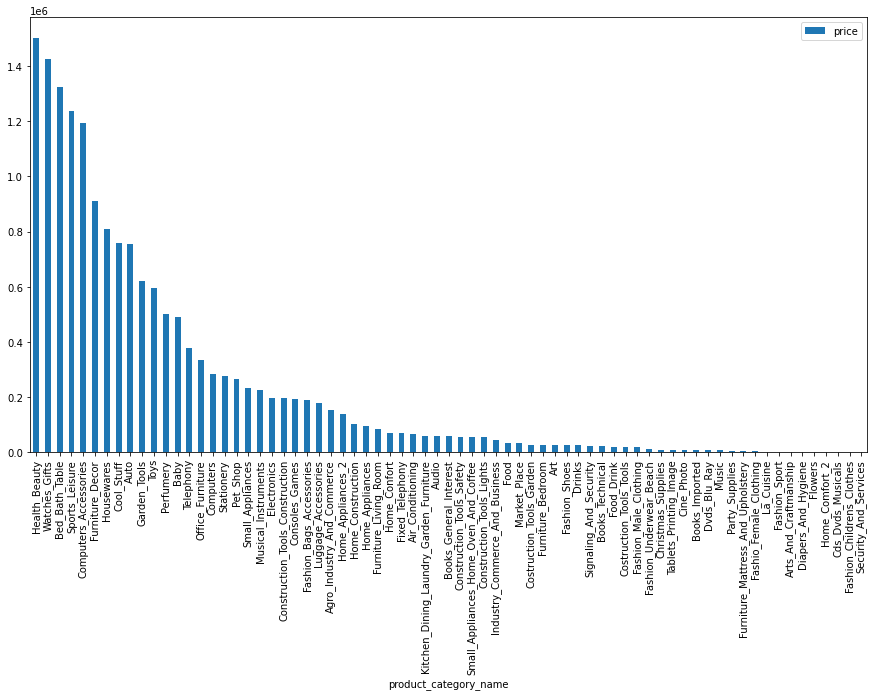

In [30]:
#sales by category
cust_order_final.loc[:, ['product_category_name', 'price']].groupby('product_category_name').sum().sort_values(by = 'price', ascending = False).plot(kind = 'bar', figsize = (15, 8))
plt.show()

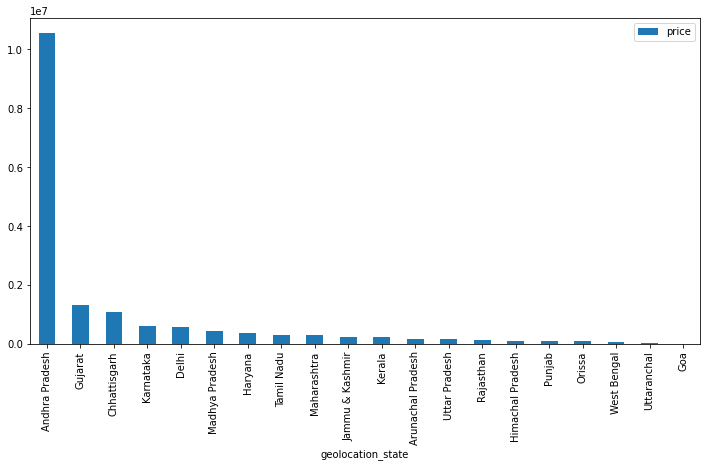

In [31]:
#sales by location
cust_order_final.loc[:, ['geolocation_state', 'price']].groupby('geolocation_state').sum().sort_values(by = 'price', ascending = False).plot(kind = 'bar', figsize = (12, 6))
plt.show()

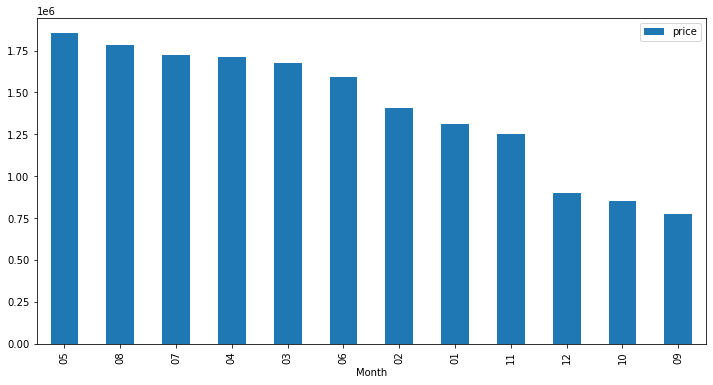

In [32]:
#sales by month
cust_order_final.loc[:, ['Month', 'price']].groupby('Month').sum().sort_values(by = 'price', ascending = False).plot(kind = 'bar', figsize = (12, 6))
plt.show()

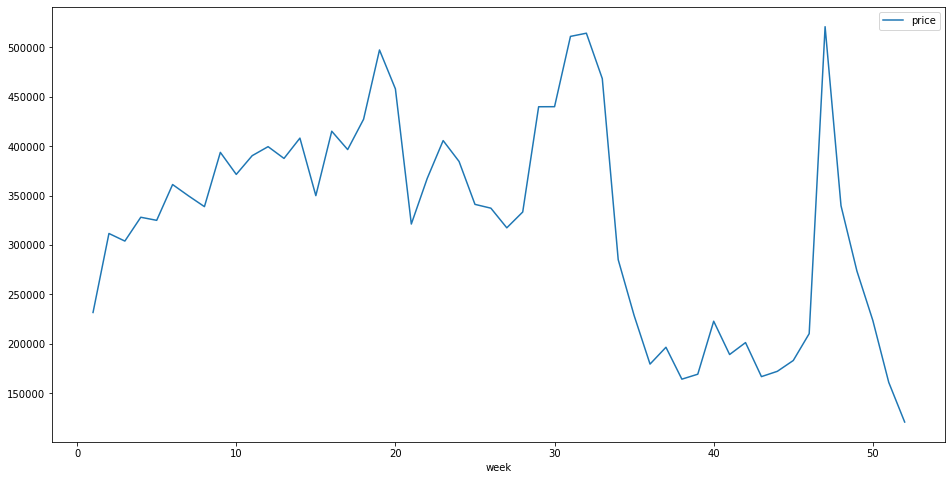

In [33]:
#sales by week
cust_order_final.loc[:, ['price']].groupby(cust_order_final.order_purchase_timestamp.dt.isocalendar().week).sum().plot(kind = 'line', figsize = (16, 8))
plt.show()

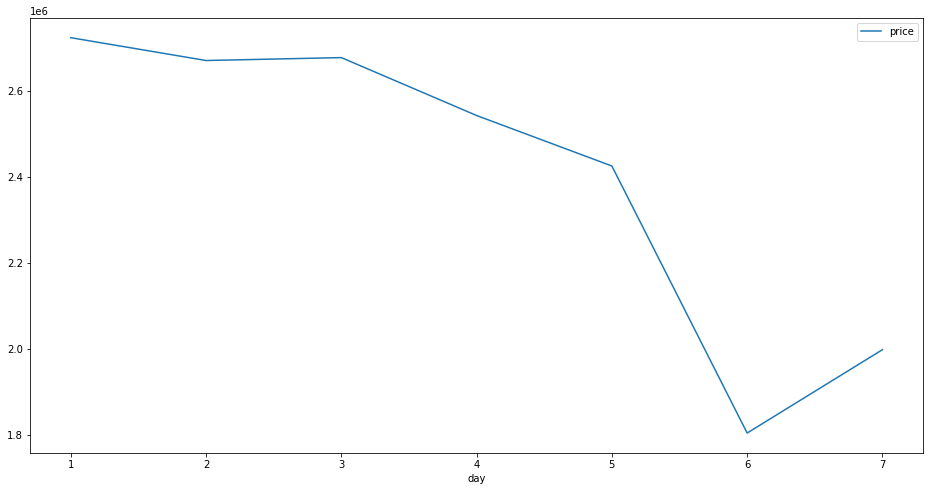

In [34]:
#sales by day
cust_order_final.loc[:, ['price']].groupby(cust_order_final.order_purchase_timestamp.dt.isocalendar().day).sum().plot(kind = 'line', figsize = (16, 8))
plt.show()

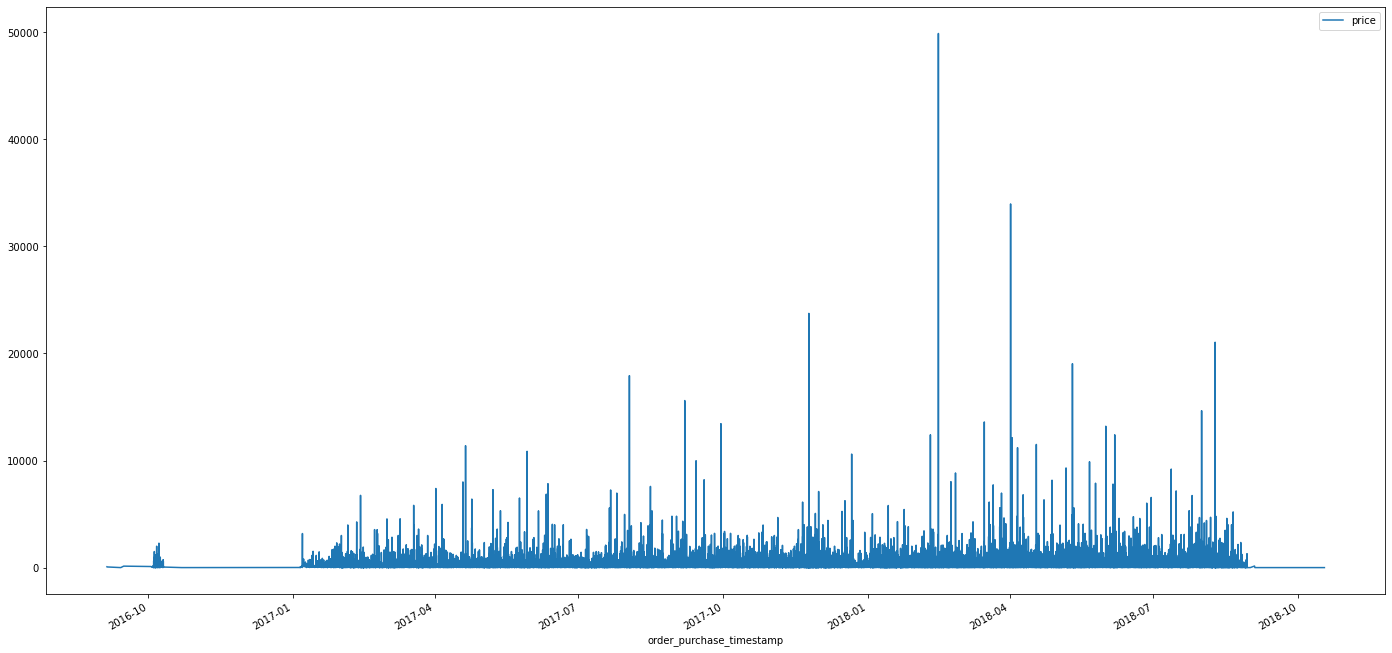

In [35]:
#sales by time
cust_order_final.loc[:, ['order_purchase_timestamp', 'price']].groupby('order_purchase_timestamp').sum().plot(kind = 'line', figsize = (24, 12))
plt.show()

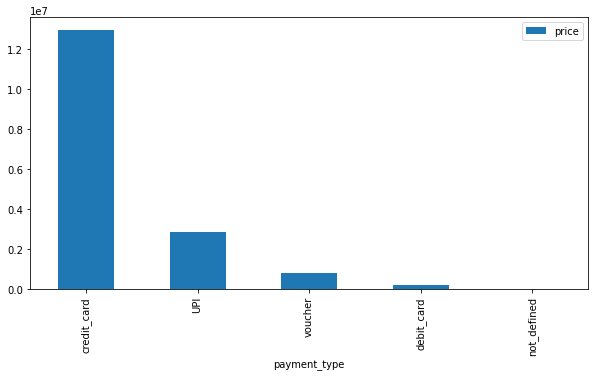

In [36]:
#sales by payment method
cust_order_final.loc[:, ['payment_type', 'price']].groupby('payment_type').sum().sort_values(by = 'price', ascending = False).plot(kind = 'bar', figsize = (10, 5))
plt.show()

# f. Popular Products by month, seller, state, category.
popular products by month

In [37]:
cust_order_final.loc[:, ['product_id', 'Month', 'order_id']].groupby(['product_id', 'Month']).count().sort_values(by = 'order_id', ascending = False)

order_id
product_id                       Month          
aca2eb7d00ea1a7b8ebd4e68314663af 01          142
11250b0d4b709fee92441c5f34122aed 02          127
53b36df67ebb7c41585e8d54d6772e08 05          126
99a4788cb24856965c36a24e339b6058 05          122
53b36df67ebb7c41585e8d54d6772e08 04          108
...                                          ...
694e58e56c74114ee0628c25f3f26f8c 07            1
                                 10            1
694ef7517a535b054fddea9154d3e627 09            1
694f7daacd749d7bde487e0f9675c5b8 02            1
fffe9eeff12fcbd74a2f2b007dde0c58 05            1

[60796 rows x 1 columns]

In [38]:
#popular products by seller
cust_order_final.loc[:, ['product_id', 'seller_id_x', 'order_id']].groupby(['product_id', 'seller_id_x']).count().sort_values(by = 'order_id', ascending=False)

,,order_id
product_id,seller_id_x,
aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,631
99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,623
422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,574
389d119b48cf3043d311335e499d9c6b,1f50f920176fa81dab994f9023523100,480
368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,450
...,...,...
70ecfc40193a5327e6921986e6484fab,96493fab2fbb13a14d0c0e8772eef5c3,1
70e9f13542ae210a1e09bae121496075,de23c3b98a88888289c6f5cc1209054a,1
70e0d082134b563e2977cf5f268ad3f9,1da3aeb70d7989d1e6d9b0e887f97c23,1


In [39]:
#popular products by state
cust_order_final.loc[:, ['product_id', 'geolocation_state', 'order_id']].groupby(['product_id', 'geolocation_state']).count().sort_values(by = 'order_id', ascending=False)

,,order_id
product_id,geolocation_state,
aca2eb7d00ea1a7b8ebd4e68314663af,Andhra Pradesh,423
99a4788cb24856965c36a24e339b6058,Andhra Pradesh,408
422879e10f46682990de24d770e7f83d,Andhra Pradesh,351
389d119b48cf3043d311335e499d9c6b,Andhra Pradesh,280
53b36df67ebb7c41585e8d54d6772e08,Andhra Pradesh,279
...,...,...
68b8e52885d1c878e362c8a4d323747b,Maharashtra,1
68b92c941d4052c59ba87c2b2824bfa8,Chhattisgarh,1
68b9af8698585855f2503727e150d453,Andhra Pradesh,1


In [40]:
#popular products by category
cust_order_final.loc[:, ['product_id', 'product_category_name', 'order_id']].groupby(['product_id', 'product_category_name']).count().sort_values(by = 'order_id', ascending=False)

,,order_id
product_id,product_category_name,
aca2eb7d00ea1a7b8ebd4e68314663af,Furniture_Decor,631
99a4788cb24856965c36a24e339b6058,Bed_Bath_Table,629
422879e10f46682990de24d770e7f83d,Garden_Tools,574
389d119b48cf3043d311335e499d9c6b,Garden_Tools,480
368c6c730842d78016ad823897a372db,Garden_Tools,450
...,...,...
71f5cad782714ec5d61a1bfa34543403,Consoles_Games,1
71f0bc096460c175e49cb3826bc8761a,Furniture_Decor,1
71edb37d9bd2542f8df816d01a86af3a,Sports_Leisure,1


# g. Popular categories by state, month

In [42]:
#popular categories by state
cust_order_final.loc[:, ['product_category_name', 'geolocation_state', 'order_id']].groupby(['product_category_name', 'geolocation_state']).count().sort_values(by = 'order_id', ascending=False)

,,order_id
product_category_name,geolocation_state,
Bed_Bath_Table,Andhra Pradesh,9506
Health_Beauty,Andhra Pradesh,7534
Furniture_Decor,Andhra Pradesh,6919
Sports_Leisure,Andhra Pradesh,6863
Computers_Accessories,Andhra Pradesh,6338
...,...,...
Sports_Leisure,Goa,1
Books_Imported,Maharashtra,1
Furniture_Bedroom,Arunachal Pradesh,1


In [43]:
#popular categories by month
cust_order_final.loc[:, ['product_category_name', 'Month', 'order_id']].groupby(['product_category_name', 'Month']).count().sort_values(by = 'order_id', ascending=False)

order_id
product_category_name     Month          
Bed_Bath_Table            07         1558
                          05         1488
                          08         1468
                          06         1450
Computers_Accessories     02         1432
...                                   ...
Construction_Tools_Lights 09            1
Fashio_Female_Clothing    10            1
Music                     10            1
Diapers_And_Hygiene       10            1
Cds_Dvds_Musicals         10            1

[797 rows x 1 columns]

# h. List top 10 most expensive products sorted by price

In [45]:
cust_order_final.loc[:,['product_id','price']].sort_values(by='price',ascending=False).head(10)

,product_id,price
2978,489ae2aa008f021502940f251d4cce7f,6735.00
129251,69c590f7ffc7bf8db97190b6cb6ed62e,6729.00
15460,1bdf5e6731585cf01aa8169c7028d6ad,6499.00
8071,a6492cc69376c469ab6f61d8f44de961,4799.00
9741,c3ed642d592594bb648ff4a04cee2747,4690.00
120235,259037a6a41845e455183f89c5035f18,4590.00
132528,a1beef8f3992dbd4cd8726796aa69c53,4399.87
93831,6cdf8fc1d741c76586d8b6b15e9eef30,4099.99
130231,dd113cb02b2af9c8e5787e8f1f0722f6,4059.00
6455,6902c1962dd19d540807d0ab8fade5c6,3999.90


# 2. Performing Customers/sellers Segmentation
a. Divide the customers into groups based on the revenue generated

In [46]:
cust_order_final["customer_revenue"]=pd.qcut(cust_order_final.payment_value,3,labels=('high','medium','low'))
cust_order_final.customer_revenue.value_counts()

medium    46716
high      46713
low       46709
Name: customer_revenue, dtype: int64

b. Divide the sellers into groups based on the revenue generated

In [49]:
cust_order_final["seller_revenue"]=pd.qcut(cust_order_final.payment_value,3,labels=('high','medium','low'))
cust_order_final.seller_revenue.value_counts()

medium    46716
high      46713
low       46709
Name: seller_revenue, dtype: int64

# 3. Cross-Selling (Which products are selling together)

In [51]:
cross_selling = cust_order_final.loc[:, ['order_id', 'product_category_name']].groupby('order_id').agg({'product_category_name' : list}).assign(count = lambda x : x['product_category_name'].str.len())
cross_selling[cross_selling['count'] > 1].sort_values(by = 'count', ascending = False)

,product_category_name,count
order_id,,
465c2e1bee4561cb39e0db8c5993aafc,"[Agro_Industry_And_Commerce, Agro_Industry_And...",120
cf287f639abd10b1630574c4a065d4f1,"[Stationery, Stationery, Stationery, Stationer...",108
61edec4c7086a5383dc4f5e6fca69e9b,"[Sports_Leisure, Sports_Leisure, Sports_Leisur...",98
3241baf723e29f140a6ff9082b7f9aca,"[Computers_Accessories, Computers_Accessories,...",98
1b15974a0141d54e36626dca3fdc731a,"[Computers_Accessories, Computers_Accessories,...",80
...,...,...
66eb2e45baf0a88a06f8d17a1e756ff6,"[Furniture_Decor, Furniture_Decor]",2
66ece7c73f4550ac89c08ffa53e85dc2,"[Health_Beauty, Health_Beauty]",2
66ed65fb801b44984e7a79b2d0496772,"[Musical_Instruments, Musical_Instruments]",2


# 4. Payment Behaviour
a. How customers are paying?

In [54]:
cust_order_final.payment_type.dropna().unique()

array(['credit_card', 'UPI', 'debit_card', 'voucher', 'not_defined'],
      dtype=object)

b. Which payment channels are used by most customers?

In [58]:
cust_order_final.payment_type.value_counts().head(1)

credit_card    102746
Name: payment_type, dtype: int64

# 5. Customer satisfaction towards category & product¶

a. Which categories (top 10) are maximum rated & minimum rated?

In [60]:
#maximum rated categories
cust_order_final.loc[:, ['product_category_name', 'review_score']].groupby('product_category_name').mean().sort_values(by = 'review_score', ascending = False).head(10)

,review_score
product_category_name,
Books_Imported,4.664000
Cds_Dvds_Musicals,4.600000
Fashion_Childrens_Clothes,4.500000
Small_Appliances_Home_Oven_And_Coffee,4.450000
Books_General_Interest,4.444126
Costruction_Tools_Tools,4.416000
Food_Drink,4.398230
Books_Technical,4.388704
Cine_Photo,4.336957


In [66]:
#minimum rated categories
cust_order_final.loc[:, ['product_category_name', 'review_score']].groupby('product_category_name').mean().sort_values(by = 'review_score', ascending = False).tail(10)

,review_score
product_category_name,
Furniture_Mattress_And_Upholstery,3.800000
Furniture_Living_Room,3.763754
Fixed_Telephony,3.723473
Fashio_Female_Clothing,3.696429
Office_Furniture,3.534851
La_Cuisine,3.500000
Fashion_Male_Clothing,3.469565
Diapers_And_Hygiene,3.304348
Home_Comfort_2,3.300000


b. Which products (top10) are maximum rated & minimum rated?

In [73]:
#maximum rated products
cust_order_final.loc[:, ['product_id', 'review_score']].groupby('product_id').mean().sort_values(by = 'review_score', ascending = False).head(10)

,review_score
product_id,
00066f42aeeb9f3007548bb9d3f33c38,5.0
86743ff92eee3d16b7df59cddd583b8c,5.0
868ceb027ab706a4dee42e2220006b85,5.0
868969d3a93aeeab7bfcd4fc3d3d65de,5.0
868766ed2172644fdd977d6bd395a107,5.0
8684bd8f93b4f4038d07188a23811e93,5.0
867c96d2bb67aba6500a4c509cf76072,5.0
867b820367ec206b38a357f2c12454b7,5.0
867901d7e8488fb97f1fb538c09d476e,5.0


In [74]:
#minimum rated products
cust_order_final.loc[:, ['product_id', 'review_score']].groupby('product_id').mean().sort_values(by = 'review_score', ascending = False).tail(10)

,review_score
product_id,
37c599910c4de68c0bf1af0c6428ab1c,1.0
856af50654f3ba4a223ae9b5b8d243c0,1.0
eae50b5c9a18c296b7fa904cf04406a5,1.0
7933eeb8cf79ae899bfac71c0edb076d,1.0
10a3a969b9e7d03b0dc2384ebbcad6ef,1.0
10a6596b3224c408ee46c8aaaa2977cd,1.0
602bd303d85e0e535a0767b9f1d85f91,1.0
859c4a81490e9402bac13f62672482d1,1.0
093cd981b714bcdff182b427d87fc8fc,1.0


# c. Average rating by location, seller, product, category, month etc.

In [78]:
#average rating by location
cust_order_final.loc[:, ['geolocation_state','review_score']].groupby('geolocation_state').mean().sort_values(by='review_score',ascending=False)

,review_score
geolocation_state,
Goa,4.777778
Punjab,4.154211
Rajasthan,4.148678
Uttar Pradesh,4.110911
Tamil Nadu,4.103523
Haryana,4.103113
Orissa,4.088589
Maharashtra,4.075871
Gujarat,4.066957


In [77]:
#average rating by seller
cust_order_final.loc[:, ['seller_id_x', 'review_score']].groupby('seller_id_x').mean().sort_values(by = 'review_score', ascending = False)

,review_score
seller_id_x,
32e5635e63cb374eb63afdd242fb6134,5.0
41958cbd3335433c8740300e8cd600d5,5.0
d7827b2af99326a03b0ed9c7a24db0d3,5.0
eb1bf309f4f6af9a97e9ddac3fdbeabe,5.0
a56a8043ebf66e42119618fb8cf232c6,5.0
...,...
1444c08e64d55fb3c25f0f09c07ffcf2,1.0
ad738d3fcf42655ed15c4960b7b6c601,1.0
e46bc031f2c5bae4ccb40bb90712e9b4,1.0


In [79]:
#average rating by product
cust_order_final.loc[:, ['product_id', 'review_score']].groupby('product_id').mean().sort_values(by = 'review_score', ascending = False)

,review_score
product_id,
00066f42aeeb9f3007548bb9d3f33c38,5.0
86743ff92eee3d16b7df59cddd583b8c,5.0
868ceb027ab706a4dee42e2220006b85,5.0
868969d3a93aeeab7bfcd4fc3d3d65de,5.0
868766ed2172644fdd977d6bd395a107,5.0
...,...
10a6596b3224c408ee46c8aaaa2977cd,1.0
602bd303d85e0e535a0767b9f1d85f91,1.0
859c4a81490e9402bac13f62672482d1,1.0


In [80]:
#average rating by category
cust_order_final.loc[:, ['product_category_name', 'review_score']].groupby('product_category_name').mean().sort_values(by = 'review_score', ascending = False)

,review_score
product_category_name,
Books_Imported,4.664000
Cds_Dvds_Musicals,4.600000
Fashion_Childrens_Clothes,4.500000
Small_Appliances_Home_Oven_And_Coffee,4.450000
Books_General_Interest,4.444126
...,...
La_Cuisine,3.500000
Fashion_Male_Clothing,3.469565
Diapers_And_Hygiene,3.304348


In [81]:
#average rating by month
cust_order_final.loc[:, ['Month', 'review_score']].groupby('Month').mean().sort_values(by = 'review_score', ascending = False)

,review_score
Month,
08,4.205031
07,4.162123
06,4.147448
05,4.106060
09,4.090425
04,4.049521
10,3.970492
12,3.941055
01,3.934677
